### Ant Colony Optimiation

- We are generating random points so that we can plot it in the graph


In [67]:
from random import randint,choices
total_num_of_points = 80
all_points = [(randint(0,200),randint(0,200)) for i in range(total_num_of_points)]
total_num_of_points = len(all_points)
points_name = [i for i in range(total_num_of_points)]
starting_point = 0

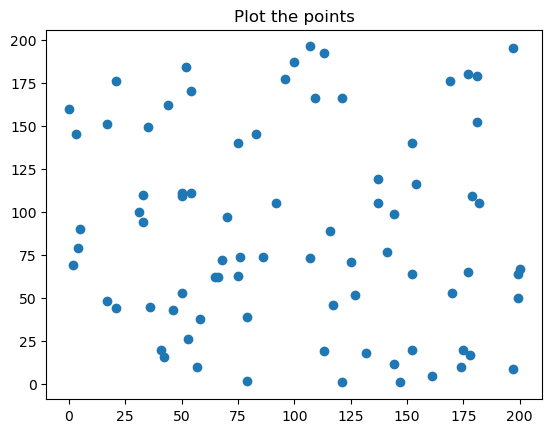

In [68]:
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in all_points],[x[1] for x in all_points],label="Points")
plt.title("Plot the points")
plt.show()

## Find distance between two points

In [69]:
import math
def get_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

## Initialize path_matrix (distance between two points) and pheromone matrix (pheromone value)

In [70]:
path_matrix = [[ get_distance(x,y) for y in all_points] for x in all_points]
pheromone_matrix =[[0.1 for y in all_points] for x in all_points]

### Printing the data in a beautiful way

In [71]:
def formatted_print(data):
    for i in data:
        print(i)

### Calculating the probability using the equation

In [72]:
etta = 1.5
xetta =1.5
def get_probability(phero,l):
    return math.pow(phero,etta)*math.pow(1/l,xetta)

### Choose the option based on probability value based on all the values

In [73]:
def choose_destinatination(start_from,not_visited) -> int:
    all_propbaility = []
    for m in not_visited:
        t = get_probability(pheromone_matrix[start_from][m],path_matrix[start_from][m])
        all_propbaility.append(t)
    z = choices(not_visited,all_propbaility)
    return z[0]


### Find the total distance travelled by summing the distances

In [74]:
def get_distance_performance(path):
    path_length = []
    for i in range(len(path)-1):
        path_length.append(path_matrix[path[i]][path[i+1]])
    total_distance = sum(path_length)
    return total_distance

### Plot the graph

In [75]:
def plot(points):
    plt.scatter([x[0] for x in all_points],[x[1] for x in all_points],label="Points")
    path_points = [all_points[x] for x in points]
    plt.plot([x[0] for x in path_points],[x[1] for x in path_points],label="Points")
    plt.title(get_distance_performance(points))
    plt.show()

### Update the pheromones 

In [76]:
loss_of_smell = 0
def update_pheromone(path):
    path_length = []
    for i in range(len(path)-1):
        path_length.append(path_matrix[path[i]][path[i+1]])
    total_distance = sum(path_length)
    for i in range(len(path)-1):
        pheromone_matrix[path[i]][path[i+1]] = pheromone_matrix[path[i]][path[i+1]] + 1/total_distance
    for i in range(len(pheromone_matrix)):
        for j in range(len(pheromone_matrix[0])):
            pheromone_matrix[i][j] = pheromone_matrix[i][j] * (1-loss_of_smell)

### Iteration of ant colony algorithm

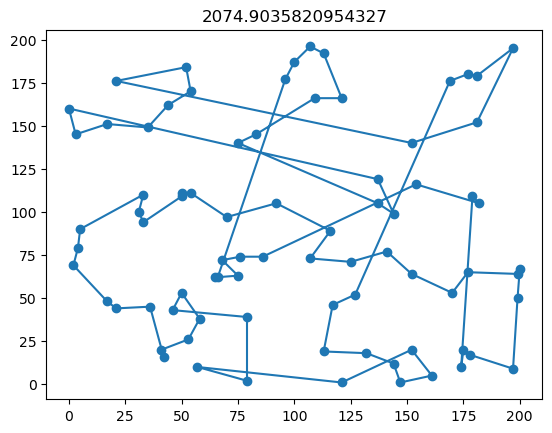

[0.1, 0.10343216905722616, 0.15476759836816692, 13.710972020720169, 0.8489340067999611, 0.10340093747941352, 0.10743955896560231, 0.10408278113120643, 0.10368372434134755, 0.10351751336241022, 0.10597453027424708, 0.10637232394434804, 0.2677725070988783, 0.11178457169680682, 0.10301825730579355, 0.10775810911182154, 0.10450793289246357, 0.10888833626437938, 0.18470700313763166, 0.10644688011030971, 0.10397080999996436, 0.10784698366571552, 0.10734338374370504, 0.10427315347524299, 0.10354128800203423, 0.11117818423295471, 0.10990353187189157, 0.10622434010456067, 0.11674070194013376, 0.10527779584931812, 0.10370589143577456, 0.10255026069143851, 0.10451927772074004, 0.10692760737958848, 0.11878336418137668, 0.10330440066962228, 0.10310573058495924, 0.10324132877818962, 0.11203646788727509, 0.11664942662725308, 0.10599749713201662, 0.10316592398405218, 0.11778822855875133, 0.11495304774110386, 0.10880280547899833, 0.10562208734173822, 0.11221483681028283, 0.13201161978354733, 0.12245399

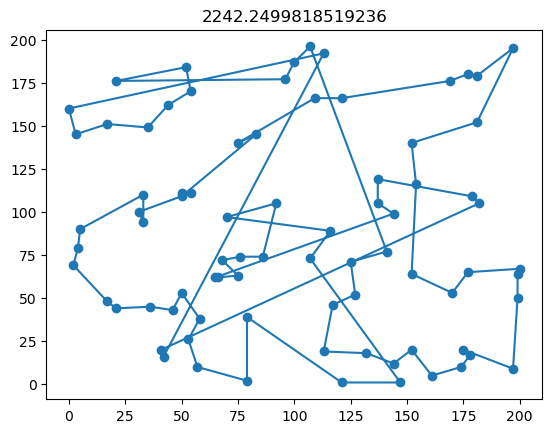

[0.1, 0.1042459917707132, 0.15607554968614837, 17.44666276891862, 0.8817562427609557, 0.10340093747941352, 0.10743955896560231, 0.10408278113120643, 0.10368372434134755, 0.10351751336241022, 0.10597453027424708, 0.10637232394434804, 0.2711623143861053, 0.11217398014534807, 0.10301825730579355, 0.1082389787125731, 0.10450793289246357, 0.10888833626437938, 0.185660132203795, 0.10644688011030971, 0.10397080999996436, 0.10784698366571552, 0.10734338374370504, 0.10427315347524299, 0.10354128800203423, 0.11157558274217358, 0.10990353187189157, 0.10661133954440755, 0.11674070194013376, 0.10527779584931812, 0.10370589143577456, 0.10255026069143851, 0.10451927772074004, 0.10692760737958848, 0.11927356807554879, 0.10330440066962228, 0.10310573058495924, 0.10324132877818962, 0.11203646788727509, 0.11712298146083644, 0.10639124578614073, 0.10316592398405218, 0.11820037882343211, 0.11495304774110386, 0.10880280547899833, 0.10562208734173822, 0.11221483681028283, 0.132451191201907, 0.122984813881721

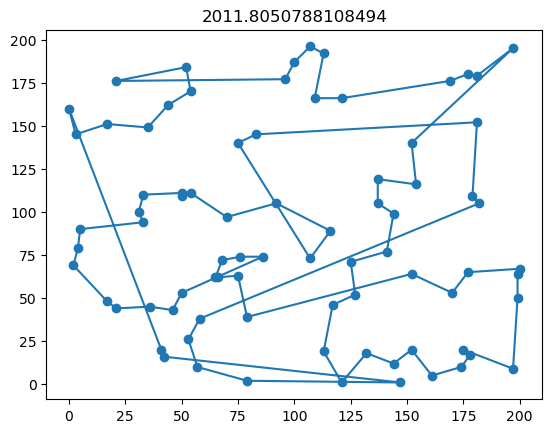

[0.1, 0.1042459917707132, 0.15707784206218367, 21.298697008543307, 0.9071819322872114, 0.10340093747941352, 0.10743955896560231, 0.10408278113120643, 0.10368372434134755, 0.10351751336241022, 0.10597453027424708, 0.10637232394434804, 0.27310470542340426, 0.11217398014534807, 0.10301825730579355, 0.1082389787125731, 0.10450793289246357, 0.10928528624268741, 0.1866107359262378, 0.10739447195300711, 0.10397080999996436, 0.10784698366571552, 0.10734338374370504, 0.10469486653385005, 0.10354128800203423, 0.11157558274217358, 0.10990353187189157, 0.10661133954440755, 0.11722017002378896, 0.10527779584931812, 0.10370589143577456, 0.10255026069143851, 0.10451927772074004, 0.10692760737958848, 0.12019140286146722, 0.10330440066962228, 0.10310573058495924, 0.10324132877818962, 0.11203646788727509, 0.11712298146083644, 0.10639124578614073, 0.10364508595482744, 0.11820037882343211, 0.1154800050968018, 0.10880280547899833, 0.10562208734173822, 0.11269466520958368, 0.132451191201907, 0.1229848138817

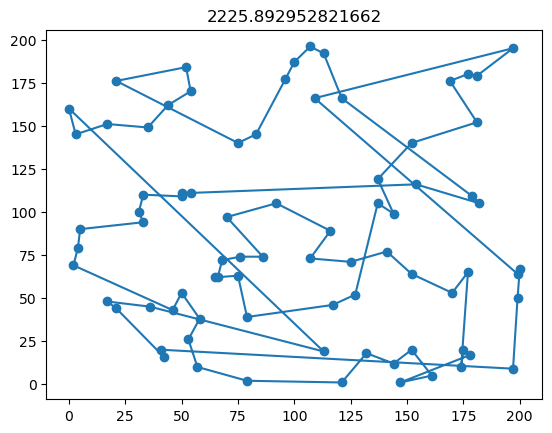

[0.1, 0.1042459917707132, 0.1575064363271694, 25.241373395390518, 0.9260985008705325, 0.10340093747941352, 0.10743955896560231, 0.10408278113120643, 0.10368372434134755, 0.10351751336241022, 0.10597453027424708, 0.10637232394434804, 0.27452341737985425, 0.11217398014534807, 0.10301825730579355, 0.1082389787125731, 0.10450793289246357, 0.10928528624268741, 0.18765108176780093, 0.10739447195300711, 0.10397080999996436, 0.10784698366571552, 0.10734338374370504, 0.10469486653385005, 0.10354128800203423, 0.11157558274217358, 0.10990353187189157, 0.10661133954440755, 0.11760651882275043, 0.10527779584931812, 0.10370589143577456, 0.10255026069143851, 0.10451927772074004, 0.10692760737958848, 0.12019140286146722, 0.10330440066962228, 0.10348935003155793, 0.10324132877818962, 0.11203646788727509, 0.11712298146083644, 0.10639124578614073, 0.10364508595482744, 0.11820037882343211, 0.1154800050968018, 0.10880280547899833, 0.10562208734173822, 0.11269466520958368, 0.132451191201907, 0.1229848138817

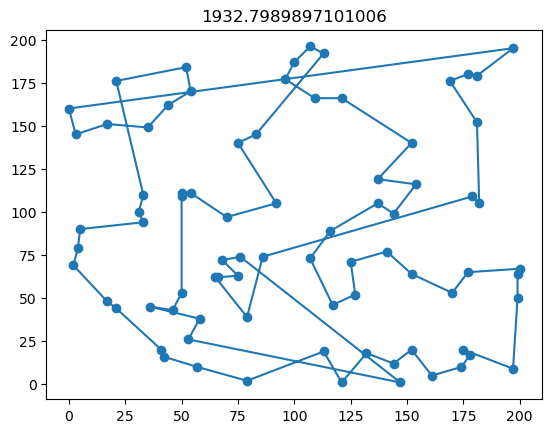

[0.1, 0.1042459917707132, 0.15840388648239392, 29.25242047537343, 0.9388424607767915, 0.10340093747941352, 0.10743955896560231, 0.10408278113120643, 0.10368372434134755, 0.10351751336241022, 0.10597453027424708, 0.10637232394434804, 0.27648474122547245, 0.11217398014534807, 0.10301825730579355, 0.1082389787125731, 0.10450793289246357, 0.10928528624268741, 0.18818243347988758, 0.10739447195300711, 0.10397080999996436, 0.10784698366571552, 0.10734338374370504, 0.10469486653385005, 0.10354128800203423, 0.11157558274217358, 0.10990353187189157, 0.10661133954440755, 0.11760651882275043, 0.10527779584931812, 0.10370589143577456, 0.10255026069143851, 0.10451927772074004, 0.10692760737958848, 0.12019140286146722, 0.10330440066962228, 0.10348935003155793, 0.10324132877818962, 0.11203646788727509, 0.11712298146083644, 0.10639124578614073, 0.10364508595482744, 0.11820037882343211, 0.1154800050968018, 0.10880280547899833, 0.10562208734173822, 0.11269466520958368, 0.132451191201907, 0.1229848138817

In [78]:
total_iterations = 100
pathAll : list[list[int]]=[]
total_ants= total_num_of_points * 5
for x in range(total_iterations):
    pathAll = []
    for i in range(total_ants):
        path : list[int]=[]
        not_visited= points_name.copy()
        not_visited.pop(starting_point)
        path.append(starting_point)
        start_from = starting_point
        while len(not_visited) > 0:
            destination = choose_destinatination(start_from, not_visited)
            start_from = destination
            not_visited =[x for x in not_visited if x!= destination]
            path.append(destination)
        path.append(starting_point)
        pathAll.append(path.copy())
    for path in pathAll:
        update_pheromone(path)
    if x % 20 == 0:
        plot(path)
        formatted_print(pheromone_matrix)
